
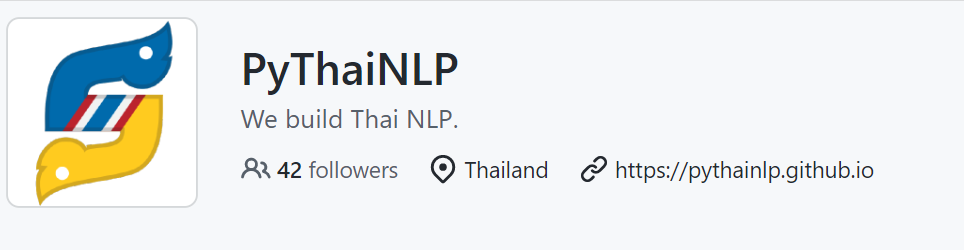

*   Tokenization
*   POS(Part of speech)
*   NER(Name Entity Recognition)

Github: https://github.com/PyThaiNLP/pythainlp

Document :https://pythainlp.github.io/docs/3.1/notes/getting_started.html

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ลง pythainlp library และ library ที่เกี่ยวข้อง
!pip install pythainlp
!pip install transformers
!pip install tensorflow deepcut
!pip install attacut
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 43.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 19.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━

In [3]:
import pythainlp

pythainlp.__version__

'3.1.1'

# Tokenization


**การตัดคำ(Tokenization)** ใน pythainlp ใช้คำสั่ง pythainlp.word_tokenize() มีหลายอัลกอริทึมเช่น

*  newmm  การตัดคำโดยอ้างอิงจากบรรณานุกรมโดยใช้เทคนิค maximal matching algorithm และ Thai Character Cluster (TCC)
*  Longest  การตัดคำโดยอ้างอิงจากบรรณานุกรมด้วย longest-matching Thai word segmentation
*  Deepcut  การตัดคำโดยใช้เทคนิค 1D Convolution Neural Network  
*  multi_cut  การตัดคำด้วย maximum matching
*  attacut การตัดคำโดยใช้ 3-Layer Dilated CNN 

และใช้คำสั่ง pythainlp.tokenize.subword_tokenize() ใน
*  wangchanberta การตัดคำโดยใช้สถาปัตยกรรมของ bert โดย wangchanberta ปล่อยออกมาเดือนมกราคม 2021

    link : https://airesearch.in.th/releases/wangchanberta-pre-trained-thai-language-model/


## Algorithm of tokenization in Pythainlp

In [4]:
from pythainlp import word_tokenize
from pythainlp.tokenize import subword_tokenize

text='ลานกางเต็นท์บ้านห้วยหมี พิกัดลับกลางหุบเขาจังหวัดน่าน'

print("Tokenization(newmm):", word_tokenize(text))  # default
print("Tokenization(longest):", word_tokenize(text, engine="longest"))
print("Tokenization(deepcut):", word_tokenize(text, engine="deepcut"))
print("Tokenization(multi_cut):", word_tokenize(text, engine="multi_cut"))
print("Tokenization(attacut):", word_tokenize(text, engine="attacut"))
print("Tokenization(wangchanberta):",subword_tokenize(text, engine="wangchanberta"))

Tokenization(newmm): ['ลาน', 'กาง', 'เต็นท์', 'บ้าน', 'ห้วย', 'หมี', ' ', 'พิกัด', 'ลับ', 'กลาง', 'หุบเขา', 'จังหวัด', 'น่าน']
Tokenization(longest): ['ลาน', 'กาง', 'เต็นท์', 'บ้าน', 'ห้วย', 'หมี', ' ', 'พิกัด', 'ลับ', 'กลาง', 'หุบเขา', 'จังหวัด', 'น่าน']
2/2 [==============================] - 1s 18ms/step
Tokenization(deepcut): ['ลาน', 'กางเต็นท์', 'บ้านห้วยหมี', ' ', 'พิกัด', 'ลับ', 'กลาง', 'หุบ', 'เขา', 'จังหวัดน่าน']
Tokenization(multi_cut): ['ลานกาง', 'เต็นท์', 'บ้าน', 'ห้วย', 'หมี', ' ', 'พิกัด', 'ลับ', 'กลาง', 'หุบเขา', 'จังหวัด', 'น่าน']
Tokenization(attacut): ['ลาน', 'กาง', 'เต็นท์', 'บ้านห้วย', 'หมี', ' พิกัด', 'ลับ', 'กลาง', 'หุบ', 'เขา', 'จังหวัดน่าน']


Tokenization(wangchanberta): ['▁', 'ลาน', 'กาง', 'เต็นท์', 'บ้านห้วย', 'หมี', '▁', 'พิกัด', 'ลับ', 'กลาง', 'หุบเขา', 'จังหวัด', 'น่าน']


 # Tokenization without showing whitespace

In [5]:
# import function ในการตัดคำของ pythainlp
from pythainlp import word_tokenize

text = "ลานกางเต็นท์บ้านห้วยหมี พิกัดลับกลางหุบเขาจังหวัดน่าน"

# การตัดคำโดยใช้ word_tokenize() ซึ่งมี defaultของอัลกอริทึมในการตัดคำเป็น newmm
print("Tokenization(newmm):")
print(word_tokenize(text))
# การตัดคำโดยใช้ word_tokenize() และไม่แสดงช่องว่างของคำซึ่งมี defaultของอัลกอริทึ่มในการตัดคำเป็น newmm
print("\nTokenization(newmm) and keep_whitespace=False")
print(word_tokenize(text, keep_whitespace=False))

Tokenization(newmm):
['ลาน', 'กาง', 'เต็นท์', 'บ้าน', 'ห้วย', 'หมี', ' ', 'พิกัด', 'ลับ', 'กลาง', 'หุบเขา', 'จังหวัด', 'น่าน']

Tokenization(newmm) and keep_whitespace=False
['ลาน', 'กาง', 'เต็นท์', 'บ้าน', 'ห้วย', 'หมี', 'พิกัด', 'ลับ', 'กลาง', 'หุบเขา', 'จังหวัด', 'น่าน']


## Adding words in dictonary for tokenization

In [6]:
from pythainlp.corpus.common import thai_words
from pythainlp import Tokenizer

text = "นิยายวิทยาศาสตร์ของไอแซค อสิมอฟ"

print("default dictionary:", word_tokenize(text))

# default dictionary ใน pythainlp 
words = set(thai_words())  
  
# เพิ่มคำว่า อสิมอฟ เข้าไปใน dictionary
words.add("อสิมอฟ")  
custom_tokenizer = Tokenizer(words)
print("custom dictionary :", custom_tokenizer.word_tokenize(text))

default dictionary: ['นิยาย', 'วิทยาศาสตร์', 'ของ', 'ไอแซค', ' ', 'อสิ', 'มอ', 'ฟ']
custom dictionary : ['นิยาย', 'วิทยาศาสตร์', 'ของ', 'ไอแซค', ' ', 'อสิมอฟ']


## Creating dictonary for tokenization

In [7]:
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie
thai_words=thai_words()

text = "ILO87 ว่าด้วยเสรีภาพในการสมาคมและการคุ้มครองสิทธิในการรวมตัว ILO98 ว่าด้วยสิทธิในการรวมตัวและการร่วมเจรจาต่อรอง"

print("default dictionary:", word_tokenize(text))

# สร้าง setของคำ
new_words = {"ILO87", "ILO98", "การร่วมเจรจาต่อรอง", "สิทธิในการรวมตัว", "เสรีภาพในการสมาคม", "แรงงานสัมพันธ์"}

# เพิ่มเข้าไปใน dictionary
words = new_words.union(thai_words)
custom_dictionary_trie = Trie(words)
print("custom dictionary :", word_tokenize(text, custom_dict=custom_dictionary_trie))

default dictionary: ['ILO', '87', ' ', 'ว่าด้วย', 'เสรีภาพ', 'ใน', 'การสมาคม', 'และ', 'การ', 'คุ้มครอง', 'สิทธิ', 'ใน', 'การ', 'รวมตัว', ' ', 'ILO', '98', ' ', 'ว่าด้วย', 'สิทธิ', 'ใน', 'การ', 'รวมตัว', 'และ', 'การ', 'ร่วม', 'เจรจา', 'ต่อรอง']
custom dictionary : ['ILO87', ' ', 'ว่าด้วย', 'เสรีภาพในการสมาคม', 'และ', 'การ', 'คุ้มครอง', 'สิทธิในการรวมตัว', ' ', 'ILO98', ' ', 'ว่าด้วย', 'สิทธิในการรวมตัว', 'และ', 'การร่วมเจรจาต่อรอง']


# Part-of-Speech Tagging

Part of speech คือการแบ่งชนิดของคำตามหน้าที่ตามหลักไวยากรณ์ จะแบ่งได้เป็น 8 ชนิด หลักๆ ได้แก่ คำนาม คำสรรพนาม คำกริยา คำกริยาวิเศษณ์ คำคุณศัพท์ คำบุพบท คำเชื่อม และคำอุทาน 

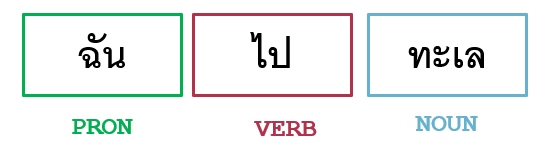


อัลกอริทึมที่ใช้ในการหา pos ในคำสั่ง  pythainlp.tag.pos_tag() มีหลายอัลกอริทึมเช่น



*   orchid : ORCHID corpus ซึ่งมาจาก https://www.academia.edu/9127599/Thai_Treebank
            
*   orchid_ud :ORCHID text ซึ่งmapped tags เข้ากับ Universal POS tags

* pud: Parallel Universal Dependencies (PUD) ซึ่งมาจาก https://github.com/UniversalDependencies/UD_Thai-PUD

Tag meaning: https://pythainlp.github.io/docs/3.1/api/tag.html

In [8]:
from pythainlp.tag import pos_tag

text = "ลานกางเต็นท์บ้านห้วยหมี พิกัดลับกลางหุบเขาจังหวัดน่าน"
# ตัดคำโดยใช้ attacut
text=word_tokenize(text, engine="attacut")
print('Tokenization(attacut): ',text)

print('\nPOS(orchid): ',pos_tag(text)) #default
print('POS(orchid_ud): ',pos_tag(text,corpus='orchid_ud'))
print('POS(pud): ',pos_tag(text,corpus='pud'))

Tokenization(attacut):  ['ลาน', 'กาง', 'เต็นท์', 'บ้านห้วย', 'หมี', ' พิกัด', 'ลับ', 'กลาง', 'หุบ', 'เขา', 'จังหวัดน่าน']

POS(orchid):  [('ลาน', 'NCMN'), ('กาง', 'NCMN'), ('เต็นท์', 'VACT'), ('บ้านห้วย', 'RPRE'), ('หมี', 'NCMN'), (' พิกัด', 'NCMN'), ('ลับ', 'VATT'), ('กลาง', 'VATT'), ('หุบ', 'NCMN'), ('เขา', 'PPRS'), ('จังหวัดน่าน', 'VACT')]
POS(orchid_ud):  [('ลาน', 'NOUN'), ('กาง', 'NOUN'), ('เต็นท์', 'VERB'), ('บ้านห้วย', 'ADP'), ('หมี', 'NOUN'), (' พิกัด', 'NOUN'), ('ลับ', 'ADJ'), ('กลาง', 'ADJ'), ('หุบ', 'NOUN'), ('เขา', 'PRON'), ('จังหวัดน่าน', 'VERB')]
POS(pud):  [('ลาน', 'NOUN'), ('กาง', 'VERB'), ('เต็นท์', 'VERB'), ('บ้านห้วย', 'NOUN'), ('หมี', 'NOUN'), (' พิกัด', 'NOUN'), ('ลับ', 'ADJ'), ('กลาง', 'ADP'), ('หุบ', 'NOUN'), ('เขา', 'PRON'), ('จังหวัดน่าน', 'VERB')]


In [9]:
from pythainlp.wangchanberta import  pos_tag
pos_tag("ผมมีชื่อว่า นายวรรณพงษ์ ภัททิยไพบูลย์")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[('ผม', 'PR'),
 ('มีชื่อว่า', 'NN'),
 (' ', 'NN'),
 ('นาย', 'NN'),
 ('วรรณ', 'NN'),
 ('พงษ์', 'NN'),
 (' ', 'NN'),
 ('ภั', 'NN'),
 ('ท', 'NN'),
 ('ทิ', 'NN'),
 ('ย', 'NN'),
 ('ไพบูลย์', 'NN')]

In [10]:
pos_tag("ผมมีชื่อว่า นายวรรณพงษ์ ภัททิยไพบูลย์",grouped_word=True)

[('ผม', 'PR'), ('มีชื่อว่า  นายวรรณพงษ์ ภัททิยไพบูลย์', 'NN')]

# Named-Entity Recognition(NER)

กระบวนการทางภาษาที่ใช้ในการหาตำแหน่งของชื่อคน,หน่วยงาน, วันที่ ,ชื่อสัตว์,สิ่งของ เป็นต้น ในเอกสาร โดย tag ที่จะใช้ BIO scheme

*   B - beginning of entity (คำเริ่มต้นของentity)
*   I - inside (คำตรงกลางหรือคำท้ายของentity)
*   O - outside entity (คำที่ไม่ใช่entity)



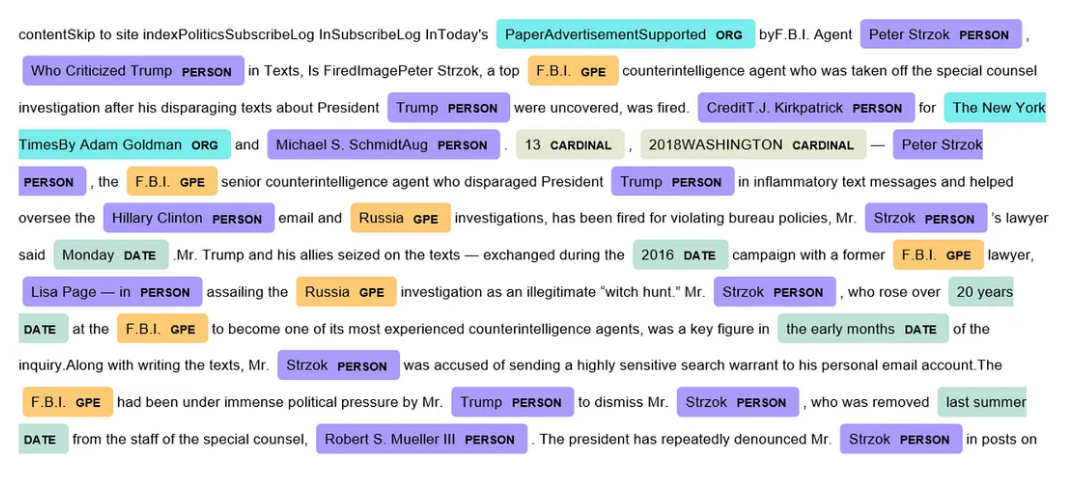

In [11]:
from pythainlp.wangchanberta import ThaiNameTagger
# เรียกใช้ function ThaiNameTagger() 
# ซึ่ง dataset_name มี 2 dataset คือ thainer และ lst20
# LST20 Corpus คลังข้อมูลภาษาไทยจากเนคเทค สวทช
# thainer corpus คลังข้อมูลภาษาไทยจาก pythinlp
NER = ThaiNameTagger(dataset_name="lst20")

In [12]:
#  แสดง BOI scheme ในประโยค
NER.get_ner("ทดสอบผมมีชื่อว่า นายวรรณพงษ์ ภัททิยไพบูลย์",tag=False)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[('ทดสอบผมมีชื่อว่า ', 'O'),
 ('นาย', 'B-TTL'),
 ('วรรณพงษ์', 'B-PER'),
 (' ', 'I-PER'),
 ('ภัททิยไพบูลย์', 'I-PER')]

In [13]:
#  แสดงtagในประโยค
NER.get_ner("ทดสอบผมมีชื่อว่า นายวรรณพงษ์ ภัททิยไพบูลย์",tag=True)

'ทดสอบผมมีชื่อว่า <TTL>นาย</TTL><PER>วรรณพงษ์ ภัททิยไพบูลย์</PER>'

Reference :


*   https://pythainlp.github.io/tutorials/notebooks/pythainlp_get_started.html#Sentence


*   https://colab.research.google.com/github/gnoparus/bualabs/blob/master/nbs/27b_pythainlp_tokenize.ipynb#scrollTo=Q8Cx6qz-9pHN
* https://pythainlp.github.io/docs/3.1/api/tag.html
* https://towardsdatascience.com/named-entity-recognition-and-classification-with-scikit-learn-f05372f07ba2
* https://meowdemy.com/%E0%B8%AA%E0%B8%A3%E0%B8%B8%E0%B8%9B-part-of-speech-%E0%B8%87%E0%B9%88%E0%B8%B2%E0%B8%A2%E0%B9%86/

* https://www.twinkl.co.th/blog/what-is-parts-of-speech
* https://aiat.or.th/lst20-corpus/
